# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'

data_dir = '/input'




"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:14<00:00, 4.12KFile/s] 


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

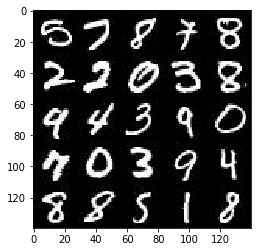

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

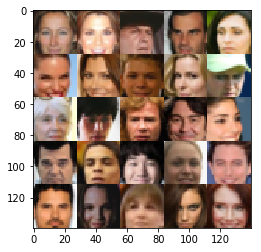

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), 'real_inputs')
    z_input = tf.placeholder(tf.float32, (None, z_dim), 'z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.2

    with tf.variable_scope('discriminator', reuse=reuse):
        # DCGAN paper -> 4 layers network
        
        # implement 4 layers 
        convolution_1 = tf.layers.conv2d(images, 64, 5, 2, 'SAME')
        relu_1 = tf.maximum(alpha * convolution_1, convolution_1)
        
        convolution_2 = tf.layers.conv2d(relu_1, 128, 5, 2, 'SAME')
        batch_norm_2 = tf.layers.batch_normalization(convolution_2, training=True)
        relu_2 = tf.maximum(alpha * batch_norm_2, batch_norm_2)
        
        convolution_3 = tf.layers.conv2d(relu_2, 256, 5, 1, 'SAME')
        batch_norm_3 = tf.layers.batch_normalization(convolution_3, training=True)
        relu_3 = tf.maximum(alpha * batch_norm_3, batch_norm_3)
        
        convolution_4 = tf.layers.conv2d(relu_3, 512, 5, 1, "SAME")
        batch_norm_4 = tf.layers.batch_normalization(convolution_4, training=True)
        relu_4 = tf.maximum(alpha * batch_norm_4, batch_norm_4)
        
        flattened = tf.reshape(relu_4, (-1, 7*7*512))
        
        logits = tf.layers.dense(flattened, 1)
        
        out = tf.sigmoid(logits)
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('generator', reuse= not is_train):
        
        fully_connected = tf.layers.dense(z, 7*7*512)
        fully_connected = tf.reshape(fully_connected, (-1, 7, 7, 512))
        fully_connected = tf.maximum(alpha * fully_connected, fully_connected)
    
        # transposing
        convolution_transpose_1 = tf.layers.conv2d_transpose(fully_connected, 256, 3, 1, "SAME")
        batch_norm_1 = tf.layers.batch_normalization(convolution_transpose_1, training=is_train)
        relu_1 = tf.maximum(alpha * batch_norm_1, batch_norm_1)
        
        convolution_transpose_2 = tf.layers.conv2d_transpose(relu_1, 128, 3, 1, 'SAME')
        batch_norm_2 = tf.layers.batch_normalization(convolution_transpose_2, training=is_train)
        relu_2 = tf.maximum(alpha * batch_norm_2, batch_norm_2)
        
        convolution_transpose_3 = tf.layers.conv2d_transpose(relu_2, 64, 3, 2, "SAME")
        batch_norm_3 = tf.layers.batch_normalization(convolution_transpose_3, training=is_train)
        relu_3 = tf.maximum(alpha * batch_norm_3, batch_norm_3)
        
        logits = tf.layers.conv2d_transpose(relu_3, out_channel_dim, 3, 2, 'SAME')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [36]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)    
    
    #Tried from comment from Slack to add control_dependencies
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [38]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    img_width = data_shape[1]
    img_height = data_shape[2]
    img_channel = data_shape[3]
    
    real_input, z_input, lr = model_inputs(img_width, img_height, img_channel, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channel)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 20
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                #running optimizers
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channel, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0154... Generator Loss: 10.5940
Epoch 1/2... Discriminator Loss: 0.1405... Generator Loss: 9.5146
Epoch 1/2... Discriminator Loss: 1.5972... Generator Loss: 1.5599
Epoch 1/2... Discriminator Loss: 0.4128... Generator Loss: 3.0198
Epoch 1/2... Discriminator Loss: 0.6231... Generator Loss: 2.4321


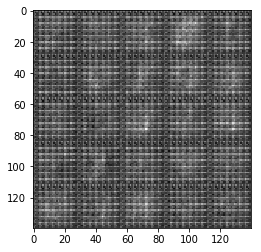

Epoch 1/2... Discriminator Loss: 0.2119... Generator Loss: 3.9386
Epoch 1/2... Discriminator Loss: 0.1446... Generator Loss: 3.6719
Epoch 1/2... Discriminator Loss: 0.4679... Generator Loss: 1.8786
Epoch 1/2... Discriminator Loss: 0.3944... Generator Loss: 1.7900
Epoch 1/2... Discriminator Loss: 0.2237... Generator Loss: 3.1714


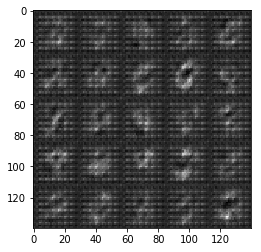

Epoch 1/2... Discriminator Loss: 0.1005... Generator Loss: 3.4747
Epoch 1/2... Discriminator Loss: 1.0523... Generator Loss: 2.1896
Epoch 1/2... Discriminator Loss: 0.6914... Generator Loss: 0.9670
Epoch 1/2... Discriminator Loss: 0.1526... Generator Loss: 2.8390
Epoch 1/2... Discriminator Loss: 0.1906... Generator Loss: 2.1239


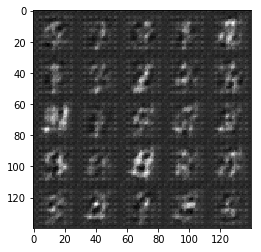

Epoch 1/2... Discriminator Loss: 0.2569... Generator Loss: 1.9736
Epoch 1/2... Discriminator Loss: 0.2895... Generator Loss: 1.8869
Epoch 1/2... Discriminator Loss: 0.1112... Generator Loss: 2.7811
Epoch 1/2... Discriminator Loss: 0.1416... Generator Loss: 2.8164
Epoch 1/2... Discriminator Loss: 9.6351... Generator Loss: 0.0001


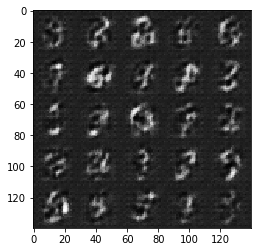

Epoch 1/2... Discriminator Loss: 0.2476... Generator Loss: 2.1162
Epoch 1/2... Discriminator Loss: 0.1290... Generator Loss: 2.8745
Epoch 1/2... Discriminator Loss: 0.1305... Generator Loss: 3.3253
Epoch 1/2... Discriminator Loss: 0.1008... Generator Loss: 3.4191
Epoch 1/2... Discriminator Loss: 1.9116... Generator Loss: 0.2403


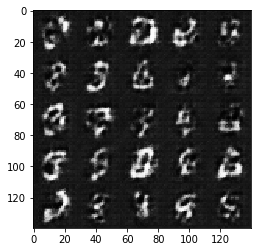

Epoch 1/2... Discriminator Loss: 0.3357... Generator Loss: 2.1648
Epoch 1/2... Discriminator Loss: 0.3567... Generator Loss: 1.6829
Epoch 1/2... Discriminator Loss: 0.4575... Generator Loss: 1.3833
Epoch 1/2... Discriminator Loss: 0.1524... Generator Loss: 2.6363
Epoch 1/2... Discriminator Loss: 1.5779... Generator Loss: 4.9434


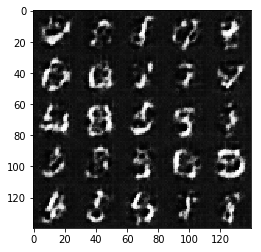

Epoch 1/2... Discriminator Loss: 0.9802... Generator Loss: 0.8245
Epoch 1/2... Discriminator Loss: 0.1739... Generator Loss: 3.0583
Epoch 1/2... Discriminator Loss: 0.1738... Generator Loss: 2.7166
Epoch 1/2... Discriminator Loss: 0.6305... Generator Loss: 1.2367
Epoch 1/2... Discriminator Loss: 2.0642... Generator Loss: 0.3087


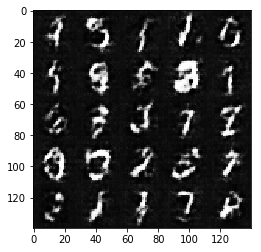

Epoch 1/2... Discriminator Loss: 0.3627... Generator Loss: 1.9364
Epoch 1/2... Discriminator Loss: 0.3065... Generator Loss: 1.8267
Epoch 1/2... Discriminator Loss: 0.3219... Generator Loss: 1.6736
Epoch 1/2... Discriminator Loss: 0.4276... Generator Loss: 1.4799
Epoch 1/2... Discriminator Loss: 0.3106... Generator Loss: 1.8875


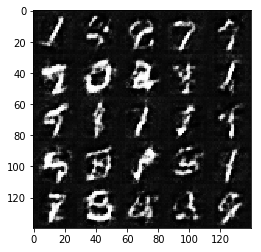

Epoch 1/2... Discriminator Loss: 0.5180... Generator Loss: 1.2442
Epoch 1/2... Discriminator Loss: 0.3828... Generator Loss: 1.4938
Epoch 1/2... Discriminator Loss: 0.3887... Generator Loss: 1.5029
Epoch 1/2... Discriminator Loss: 0.2198... Generator Loss: 3.0600
Epoch 1/2... Discriminator Loss: 10.3738... Generator Loss: 15.5222


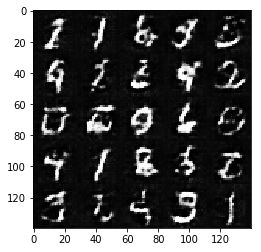

Epoch 1/2... Discriminator Loss: 0.6286... Generator Loss: 2.5916
Epoch 2/2... Discriminator Loss: 0.4326... Generator Loss: 2.2701
Epoch 2/2... Discriminator Loss: 0.4557... Generator Loss: 2.4699
Epoch 2/2... Discriminator Loss: 1.7203... Generator Loss: 0.3770
Epoch 2/2... Discriminator Loss: 1.1171... Generator Loss: 0.5915


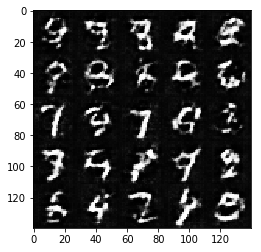

Epoch 2/2... Discriminator Loss: 0.4720... Generator Loss: 1.4151
Epoch 2/2... Discriminator Loss: 0.3604... Generator Loss: 1.7049
Epoch 2/2... Discriminator Loss: 0.6108... Generator Loss: 1.0516
Epoch 2/2... Discriminator Loss: 0.4584... Generator Loss: 1.4314
Epoch 2/2... Discriminator Loss: 0.8863... Generator Loss: 0.8174


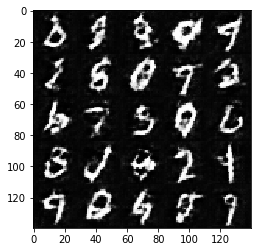

Epoch 2/2... Discriminator Loss: 0.2639... Generator Loss: 2.0801
Epoch 2/2... Discriminator Loss: 0.6562... Generator Loss: 1.0410
Epoch 2/2... Discriminator Loss: 0.1966... Generator Loss: 3.6868
Epoch 2/2... Discriminator Loss: 1.5880... Generator Loss: 0.4703
Epoch 2/2... Discriminator Loss: 0.6233... Generator Loss: 1.9264


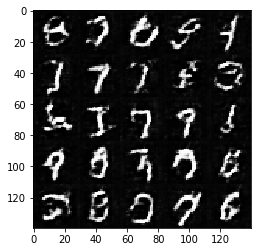

Epoch 2/2... Discriminator Loss: 0.5808... Generator Loss: 1.9866
Epoch 2/2... Discriminator Loss: 0.2419... Generator Loss: 2.9192
Epoch 2/2... Discriminator Loss: 0.5648... Generator Loss: 1.3219
Epoch 2/2... Discriminator Loss: 0.6695... Generator Loss: 1.0982
Epoch 2/2... Discriminator Loss: 0.7921... Generator Loss: 0.8475


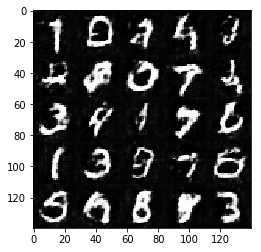

Epoch 2/2... Discriminator Loss: 0.7594... Generator Loss: 2.1819
Epoch 2/2... Discriminator Loss: 0.6888... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 0.8476... Generator Loss: 0.9151
Epoch 2/2... Discriminator Loss: 0.6280... Generator Loss: 1.1597
Epoch 2/2... Discriminator Loss: 0.5024... Generator Loss: 1.4109


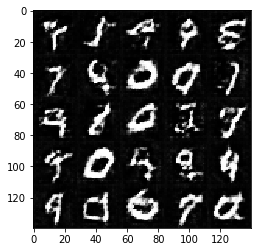

Epoch 2/2... Discriminator Loss: 0.5788... Generator Loss: 1.3465
Epoch 2/2... Discriminator Loss: 0.6739... Generator Loss: 1.0691
Epoch 2/2... Discriminator Loss: 0.8398... Generator Loss: 0.8432
Epoch 2/2... Discriminator Loss: 0.7075... Generator Loss: 1.0662
Epoch 2/2... Discriminator Loss: 0.6575... Generator Loss: 1.0773


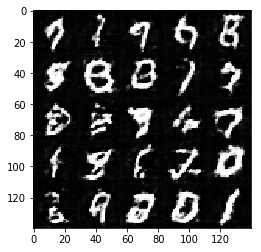

Epoch 2/2... Discriminator Loss: 0.6778... Generator Loss: 0.9196
Epoch 2/2... Discriminator Loss: 0.8929... Generator Loss: 0.8483
Epoch 2/2... Discriminator Loss: 0.3953... Generator Loss: 1.8625
Epoch 2/2... Discriminator Loss: 0.5645... Generator Loss: 1.5800
Epoch 2/2... Discriminator Loss: 0.4511... Generator Loss: 1.9685


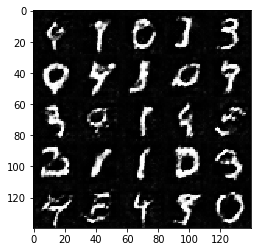

Epoch 2/2... Discriminator Loss: 0.9724... Generator Loss: 0.7025
Epoch 2/2... Discriminator Loss: 0.3049... Generator Loss: 1.9669
Epoch 2/2... Discriminator Loss: 0.8791... Generator Loss: 0.8066
Epoch 2/2... Discriminator Loss: 1.3120... Generator Loss: 0.4990
Epoch 2/2... Discriminator Loss: 11.3235... Generator Loss: 15.5726


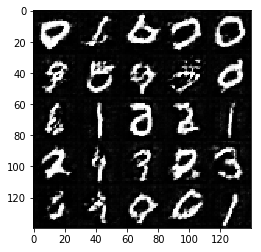

Epoch 2/2... Discriminator Loss: 0.4190... Generator Loss: 3.0829
Epoch 2/2... Discriminator Loss: 0.8884... Generator Loss: 0.7945
Epoch 2/2... Discriminator Loss: 0.5782... Generator Loss: 3.1644
Epoch 2/2... Discriminator Loss: 0.4965... Generator Loss: 1.5268
Epoch 2/2... Discriminator Loss: 0.8138... Generator Loss: 0.8886


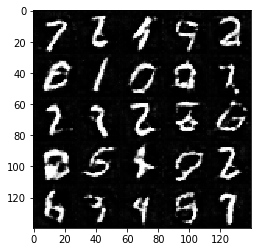

Epoch 2/2... Discriminator Loss: 0.2669... Generator Loss: 2.4925
Epoch 2/2... Discriminator Loss: 0.7533... Generator Loss: 1.1691
Epoch 2/2... Discriminator Loss: 1.8039... Generator Loss: 0.3613


In [39]:
batch_size = 64
z_dim = 100
learning_rate = 0.00015
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.1900... Generator Loss: 2.6825
Epoch 1/1... Discriminator Loss: 0.0295... Generator Loss: 5.1315
Epoch 1/1... Discriminator Loss: 0.1915... Generator Loss: 6.7039
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.0931... Generator Loss: 1.0140


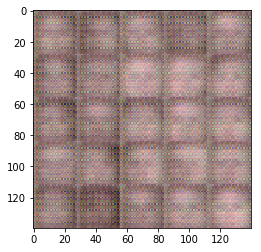

Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 2.5917
Epoch 1/1... Discriminator Loss: 0.5367... Generator Loss: 2.0613
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 0.7638... Generator Loss: 4.4143
Epoch 1/1... Discriminator Loss: 0.8280... Generator Loss: 1.3005


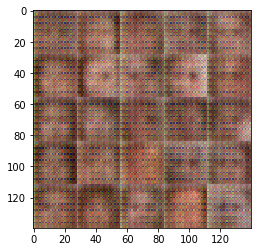

Epoch 1/1... Discriminator Loss: 1.2614... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.8191... Generator Loss: 4.6164
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 3.6111
Epoch 1/1... Discriminator Loss: 0.7044... Generator Loss: 1.8305
Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 1.7623


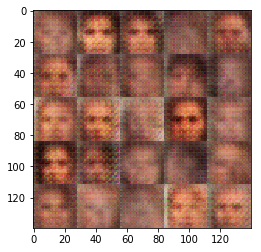

Epoch 1/1... Discriminator Loss: 0.5893... Generator Loss: 3.2823
Epoch 1/1... Discriminator Loss: 0.9272... Generator Loss: 4.1143
Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 2.3061
Epoch 1/1... Discriminator Loss: 1.4589... Generator Loss: 0.5495
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.6436


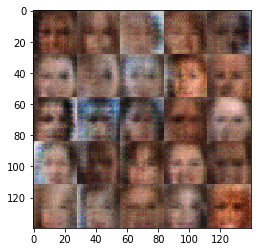

Epoch 1/1... Discriminator Loss: 2.3388... Generator Loss: 0.2660
Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 1.1578
Epoch 1/1... Discriminator Loss: 0.8092... Generator Loss: 1.2125
Epoch 1/1... Discriminator Loss: 0.9242... Generator Loss: 1.1741
Epoch 1/1... Discriminator Loss: 0.7403... Generator Loss: 1.6586


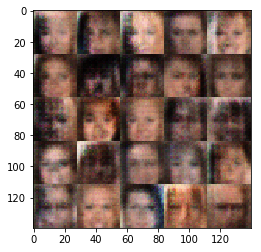

Epoch 1/1... Discriminator Loss: 0.8490... Generator Loss: 2.5784
Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.3554
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 0.6904
Epoch 1/1... Discriminator Loss: 0.6548... Generator Loss: 1.8720
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.5076


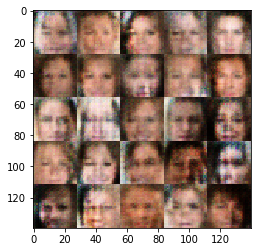

Epoch 1/1... Discriminator Loss: 0.7676... Generator Loss: 2.0249
Epoch 1/1... Discriminator Loss: 0.9875... Generator Loss: 1.1463
Epoch 1/1... Discriminator Loss: 0.7339... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 1.7507... Generator Loss: 3.8591
Epoch 1/1... Discriminator Loss: 1.6214... Generator Loss: 0.2898


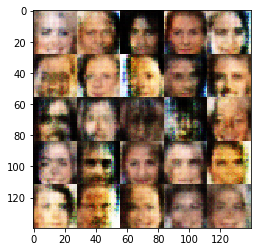

Epoch 1/1... Discriminator Loss: 0.7589... Generator Loss: 1.0055
Epoch 1/1... Discriminator Loss: 0.7833... Generator Loss: 2.4859
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.3774
Epoch 1/1... Discriminator Loss: 0.9571... Generator Loss: 1.6240
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.4593


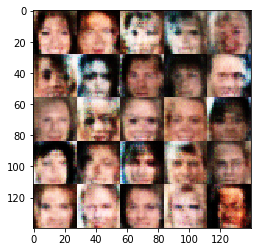

Epoch 1/1... Discriminator Loss: 0.7253... Generator Loss: 1.2318
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.0859... Generator Loss: 2.4762
Epoch 1/1... Discriminator Loss: 1.0849... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.8600


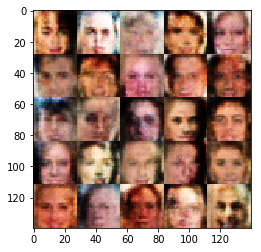

Epoch 1/1... Discriminator Loss: 0.6929... Generator Loss: 1.3021
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.5041
Epoch 1/1... Discriminator Loss: 1.0918... Generator Loss: 0.5670
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 0.5015... Generator Loss: 1.6999


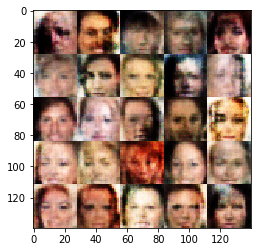

Epoch 1/1... Discriminator Loss: 0.8298... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 0.9875... Generator Loss: 2.8198
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.3909
Epoch 1/1... Discriminator Loss: 0.6541... Generator Loss: 1.1612
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.4180


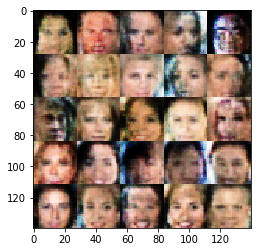

Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 0.7395
Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 1.8624
Epoch 1/1... Discriminator Loss: 1.0063... Generator Loss: 2.0546
Epoch 1/1... Discriminator Loss: 0.6562... Generator Loss: 1.2842
Epoch 1/1... Discriminator Loss: 0.4511... Generator Loss: 1.5186


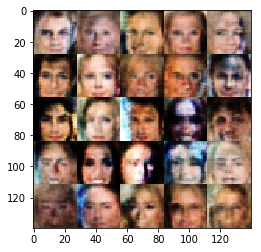

Epoch 1/1... Discriminator Loss: 0.9236... Generator Loss: 2.0928
Epoch 1/1... Discriminator Loss: 0.8495... Generator Loss: 0.8941
Epoch 1/1... Discriminator Loss: 2.2731... Generator Loss: 0.1708
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 0.8126
Epoch 1/1... Discriminator Loss: 0.9247... Generator Loss: 0.6607


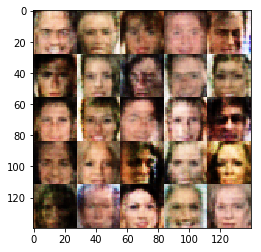

Epoch 1/1... Discriminator Loss: 0.6976... Generator Loss: 1.6432
Epoch 1/1... Discriminator Loss: 1.6638... Generator Loss: 0.2947
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.4934
Epoch 1/1... Discriminator Loss: 0.3108... Generator Loss: 2.6563
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.4192


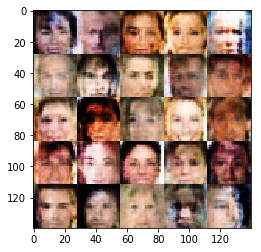

Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 0.7902... Generator Loss: 2.8541
Epoch 1/1... Discriminator Loss: 1.2372... Generator Loss: 2.1749
Epoch 1/1... Discriminator Loss: 0.6623... Generator Loss: 1.1084
Epoch 1/1... Discriminator Loss: 0.4899... Generator Loss: 1.4415


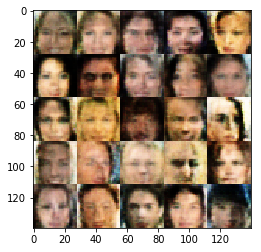

Epoch 1/1... Discriminator Loss: 0.4660... Generator Loss: 2.1716
Epoch 1/1... Discriminator Loss: 0.6994... Generator Loss: 1.7315
Epoch 1/1... Discriminator Loss: 0.6437... Generator Loss: 1.3790
Epoch 1/1... Discriminator Loss: 0.8529... Generator Loss: 1.8627
Epoch 1/1... Discriminator Loss: 1.4452... Generator Loss: 0.4034


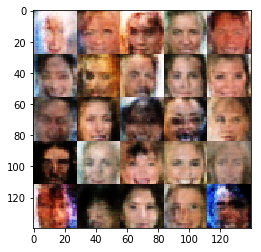

Epoch 1/1... Discriminator Loss: 0.5623... Generator Loss: 1.7962
Epoch 1/1... Discriminator Loss: 0.8572... Generator Loss: 1.7414
Epoch 1/1... Discriminator Loss: 2.1626... Generator Loss: 0.1698
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 3.2991
Epoch 1/1... Discriminator Loss: 0.6948... Generator Loss: 1.4253


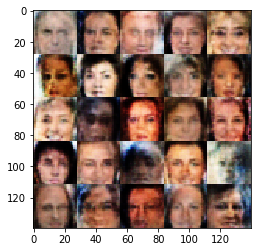

Epoch 1/1... Discriminator Loss: 0.6406... Generator Loss: 1.8524
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 0.8411
Epoch 1/1... Discriminator Loss: 0.7703... Generator Loss: 1.0721
Epoch 1/1... Discriminator Loss: 0.3714... Generator Loss: 2.5769
Epoch 1/1... Discriminator Loss: 0.6887... Generator Loss: 1.6258


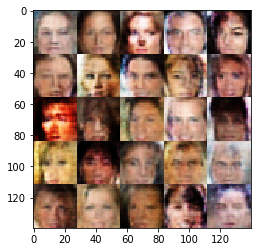

Epoch 1/1... Discriminator Loss: 0.6470... Generator Loss: 1.2970
Epoch 1/1... Discriminator Loss: 0.6688... Generator Loss: 1.0465
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 0.8556
Epoch 1/1... Discriminator Loss: 0.8252... Generator Loss: 0.8857
Epoch 1/1... Discriminator Loss: 2.0059... Generator Loss: 0.2132


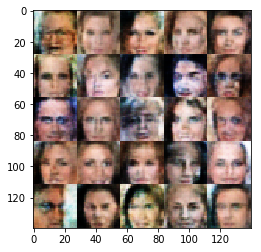

Epoch 1/1... Discriminator Loss: 0.3810... Generator Loss: 1.5770
Epoch 1/1... Discriminator Loss: 0.8303... Generator Loss: 1.7333
Epoch 1/1... Discriminator Loss: 0.7518... Generator Loss: 1.0831
Epoch 1/1... Discriminator Loss: 0.5031... Generator Loss: 1.6530
Epoch 1/1... Discriminator Loss: 1.8216... Generator Loss: 0.2630


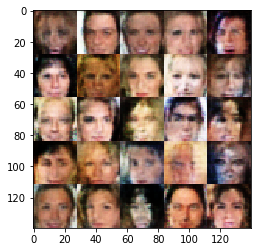

Epoch 1/1... Discriminator Loss: 0.4804... Generator Loss: 1.3531
Epoch 1/1... Discriminator Loss: 0.8837... Generator Loss: 2.6664
Epoch 1/1... Discriminator Loss: 0.3752... Generator Loss: 1.7741
Epoch 1/1... Discriminator Loss: 0.6869... Generator Loss: 2.0243
Epoch 1/1... Discriminator Loss: 0.4516... Generator Loss: 1.4202


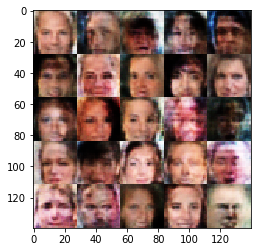

Epoch 1/1... Discriminator Loss: 1.8688... Generator Loss: 4.7962
Epoch 1/1... Discriminator Loss: 0.6732... Generator Loss: 1.2593
Epoch 1/1... Discriminator Loss: 2.4793... Generator Loss: 0.1375
Epoch 1/1... Discriminator Loss: 0.6242... Generator Loss: 1.1411
Epoch 1/1... Discriminator Loss: 0.7252... Generator Loss: 2.2770


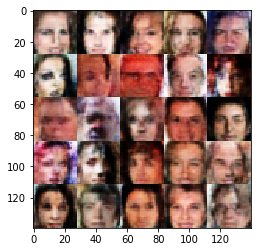

Epoch 1/1... Discriminator Loss: 0.7973... Generator Loss: 2.9339
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 2.6904
Epoch 1/1... Discriminator Loss: 0.5196... Generator Loss: 1.4600
Epoch 1/1... Discriminator Loss: 0.2227... Generator Loss: 2.6952
Epoch 1/1... Discriminator Loss: 0.2886... Generator Loss: 2.1502


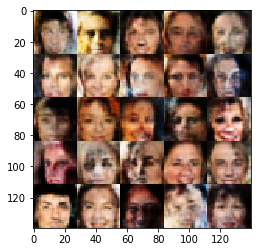

Epoch 1/1... Discriminator Loss: 0.3232... Generator Loss: 1.7664
Epoch 1/1... Discriminator Loss: 0.9127... Generator Loss: 1.3188
Epoch 1/1... Discriminator Loss: 0.2565... Generator Loss: 2.3606
Epoch 1/1... Discriminator Loss: 0.5731... Generator Loss: 1.1932
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 4.3845


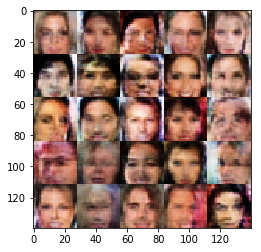

Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 0.5435... Generator Loss: 1.6594
Epoch 1/1... Discriminator Loss: 0.4232... Generator Loss: 1.5294
Epoch 1/1... Discriminator Loss: 0.2415... Generator Loss: 2.4564
Epoch 1/1... Discriminator Loss: 2.5906... Generator Loss: 0.1402


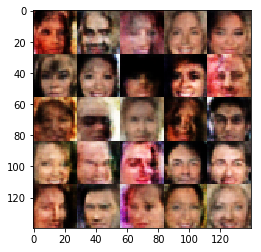

Epoch 1/1... Discriminator Loss: 0.3472... Generator Loss: 2.3301
Epoch 1/1... Discriminator Loss: 0.4082... Generator Loss: 1.5791
Epoch 1/1... Discriminator Loss: 0.1345... Generator Loss: 4.1769
Epoch 1/1... Discriminator Loss: 0.1827... Generator Loss: 2.8213
Epoch 1/1... Discriminator Loss: 0.2370... Generator Loss: 2.2972


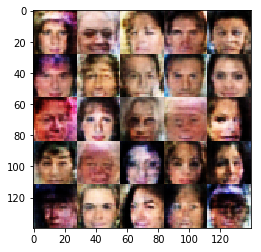

Epoch 1/1... Discriminator Loss: 0.7348... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 0.6592... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 0.3321... Generator Loss: 2.0149
Epoch 1/1... Discriminator Loss: 0.4899... Generator Loss: 3.9444
Epoch 1/1... Discriminator Loss: 0.2036... Generator Loss: 5.2839


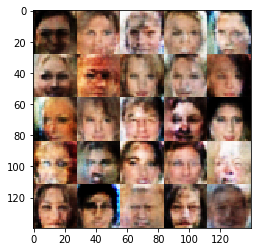

Epoch 1/1... Discriminator Loss: 0.1932... Generator Loss: 4.4032
Epoch 1/1... Discriminator Loss: 0.3788... Generator Loss: 3.2483
Epoch 1/1... Discriminator Loss: 1.4433... Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 0.8247... Generator Loss: 1.1212
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.3941


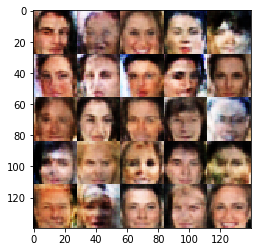

Epoch 1/1... Discriminator Loss: 0.4787... Generator Loss: 2.5913
Epoch 1/1... Discriminator Loss: 0.3965... Generator Loss: 2.1448
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 1.6149
Epoch 1/1... Discriminator Loss: 0.3459... Generator Loss: 1.7972
Epoch 1/1... Discriminator Loss: 0.8531... Generator Loss: 0.8354


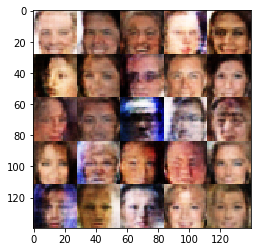

Epoch 1/1... Discriminator Loss: 0.1336... Generator Loss: 2.4869
Epoch 1/1... Discriminator Loss: 0.3489... Generator Loss: 1.6653
Epoch 1/1... Discriminator Loss: 0.8742... Generator Loss: 2.2554
Epoch 1/1... Discriminator Loss: 0.5094... Generator Loss: 2.0594
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 1.0341


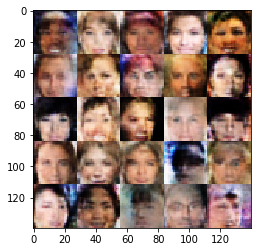

Epoch 1/1... Discriminator Loss: 0.7804... Generator Loss: 0.9307
Epoch 1/1... Discriminator Loss: 0.5861... Generator Loss: 1.1580
Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 1.3289
Epoch 1/1... Discriminator Loss: 0.7151... Generator Loss: 0.9925
Epoch 1/1... Discriminator Loss: 0.5087... Generator Loss: 1.3555


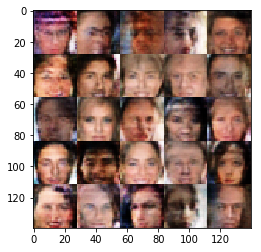

Epoch 1/1... Discriminator Loss: 0.2099... Generator Loss: 2.6323
Epoch 1/1... Discriminator Loss: 0.6157... Generator Loss: 1.0902
Epoch 1/1... Discriminator Loss: 0.7268... Generator Loss: 1.4035


In [40]:
batch_size = 64
z_dim = 100
learning_rate = 0.00015
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.